# App param scan dists figure

In [2]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd

import seaborn as sns

from math import log, floor

import numpy as np
import matplotlib.pyplot as plt

import itertools


from plots2.fns import (
    get_corner_annotations,
    get_corner_annotations_custom_labels,
    get_dose_colors,
    # get_corner_annotations_explicit
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.run import get_dists_from_pars
from poly2.utils import trait_vec, gamma_dist
from poly2.config import Config, ConfigMixture, get_asymptote_config

C:\Users\user\anaconda3\envs\poly2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
df = pd.read_csv('../outputs/combined/processed_scan_all.csv')

In [5]:
pars = (
    df
    .loc[lambda x: x.run==3]
    .head(1)
    .loc[:, [
        'mu',
        'b',
        'asymp',
        'dec_rate',
        'm_prop',
        'm_scale',
    ]
    ]
)

pars

,mu,b,asymp,dec_rate,m_prop,m_scale
105,21.750304,3.890784,0.978618,2.464423,0.83745,3.639639


Below cell takes around `4 minutes`

In [6]:
%%time
res = get_dists_from_pars(pars)

100%|█████████████████████████████████████████████████████████| 10/10 [04:34<00:00, 27.41s/it]

Wall time: 4min 34s


In [7]:
res.head()

,k,density,year,dose
0,0.001667,1.000000e+00,1,0.1
1,0.005000,4.872083e-24,1,0.1
2,0.008333,1.195697e-27,1,0.1
3,0.011667,4.439473e-30,1,0.1
4,0.015000,5.618482e-32,1,0.1


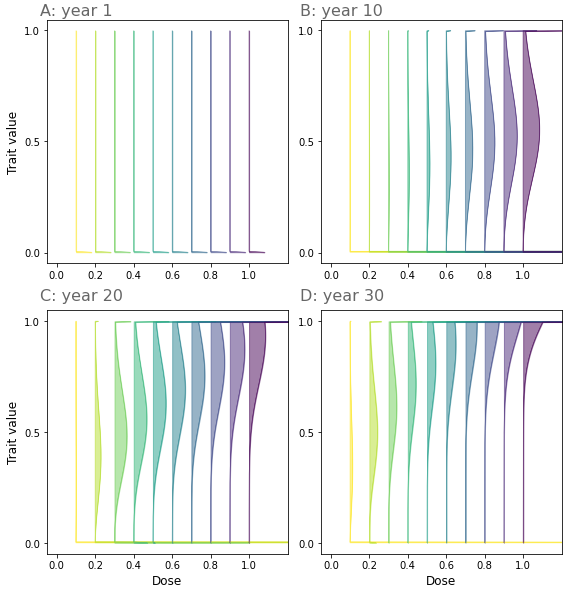

In [21]:
f, ax = plt.subplots(
    2,
    2, 
    figsize=(8,9)
)

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

# tv = trait_vec(cf.n_k)

COLZ = get_dose_colors()

scales = [
    0.08,
    40,
    10,
    6,
]

for ii, year in enumerate(res.year.unique()):
    
    rr = floor(ii/2)
    cc = ii%2
    
    scale = scales[ii]

    for d_ind, dose in enumerate(res.dose.unique()):
        
        colr = COLZ[d_ind]
        
        filt = res.loc[lambda x: ((x.year==year) & (x.dose==dose))]

        k_vals = np.array(filt.k)
        density = scale * np.array(filt.density)
        
        doses = np.repeat(dose, len(k_vals))
        
        ax[rr][cc].fill_betweenx(k_vals, doses, dose + density, alpha=0.5, color=colr)
        ax[rr][cc].plot(dose+density, k_vals, lw=0.5, c=colr)
    
    ax[rr][cc].set_xlim([-0.05, 1.2])
    ax[rr][cc].set_xticks(np.arange(0, 1.1, 0.2))
    ax[rr][cc].set_yticks([0, 0.5, 1])
    # ax[rr][cc].set_ylim([0, 1.5])


f.patch.set_facecolor('white')

ax[1][0].set_xlabel('Dose')
ax[1][1].set_xlabel('Dose')

ax[0][0].set_ylabel('Trait value')
ax[1][0].set_ylabel('Trait value')



      



plt.tight_layout(rect=[0,0,1,0.91], h_pad=3)

labels = ['A: year 1', 'B: year 10', 'C: year 20', 'D: year 30']
get_corner_annotations_custom_labels(2, 2, 0.07, 0.895, 0.45, 0.44, plt, labels)

# f

## Save

In [22]:
f.savefig('../figures/paper/app3_fig3.jpg', dpi=1200, bbox_inches="tight")